###导入相关的库

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
from lxml import etree
import re
from bs4 import BeautifulSoup
import lxml
import urllib.request
from sklearn import metrics
from pandas.core.frame import DataFrame
from sklearn.cluster import k_means
from sklearn.cluster import KMeans

###使用聚类分析，通过提取每支股票在这时间段内的涨跌幅作为聚类依据

In [4]:
pa ='C:\\Users\\23224\\数据\\爬取的数据\\股票交易数据'
for i in os.listdir(pa):
    path = 'C:/Users/23224/数据/爬取的数据/股票交易数据/'+i
    file = pd.read_csv(path,encoding='gb18030')
    files = file.set_index(file['日期'])#使用日期作为列表的索引
    files_list = files['涨跌幅']   
    data1 = pd.DataFrame(files_list)#先运行data1，再将data1赋值给data0   
   

In [5]:
data0=data1#将值赋给data0，完成之后的数据拼接，接下来这步可能运行时间有点长，但是能跑出来

In [7]:
path ='C:\\Users\\23224\\数据\\爬取的数据\\股票交易数据'
for i in os.listdir(path):
    path = 'C:/Users/23224/数据/爬取的数据/股票交易数据/'+i
    file = pd.read_csv(path,encoding='gb18030')
    files = file.set_index(file['日期'])#使用日期作为列表的索引
    files_list = files['涨跌幅']   
    data1 = pd.DataFrame(files_list)#先运行data1，再将data1赋值给data0
    data0 = data0.merge(data1,how='outer',on = '日期')#拼接函数
    

In [17]:
del data0['涨跌幅']#由于代码设置，最后一列和第一列一样，故删除最后一列涨跌幅

In [10]:
data0

,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y,...,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y,涨跌幅_x,涨跌幅_y
日期,,,,,,,,,,,,,,,,,,,,,
2020-11-18,NaN,0.0000,0.3454,-0.3243,-0.7273,0.1346,-1.2077,-0.6424,10.0407,0.5330,...,0.2779,-4.0610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-17,NaN,-0.7435,1.2238,0.5435,0.7326,-4.9872,-2.3585,-2.6407,-5.8748,-0.3188,...,-3.5084,-1.6556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-16,NaN,0.3731,0.8818,-1.919,0.3676,1.4267,0.9524,5.1132,1.8205,0.5342,...,0.9588,0.6674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-13,NaN,2.2901,-1.2195,0.3209,0.0,0.0000,-3.6697,-4.3326,0.0000,0.8621,...,11.0624,-0.4090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-12,NaN,0.0000,-0.1739,-1.3713,0.369,0.9162,4.5564,-2.1873,0.1302,-1.4862,...,5.2201,1.3594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-24,NaN,0.9766,-0.6689,-9.981,1.3407,-0.0551,-0.4103,-0.8661,1.4085,-1.3594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23,NaN,-1.6330,0.6734,-10.0103,-2.7607,2.4280,1.8809,-0.2658,-2.8285,0.8569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-20,NaN,-1.9774,-0.3356,None,3.3281,-1.3920,-0.6231,-0.0664,0.2745,0.2147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###将提取的数据框列名改为股票代码，然后下载到文件夹

In [11]:
res = requests.get('https://hq.gucheng.com/gpdmylb.html')
res_xpath = etree.HTML(res.text)
node = res_xpath.xpath('//*[@id="stock_index_right"]/div[3]/section/a[@href]/text()')
codeall = re.findall(r'\d{6}', str(node))
code_list = []
for node in codeall:
    code_list.append(node)
gp_list = code_list[3:1003]#股票代码
# print(gp_list)
m= sorted(gp_list[:1003],reverse=False)
m.pop()#
n= ['603693']
f = n+m
data0.columns = f
data0.sort_index(ascending=False)
data_new = data0.dropna(how='any',axis=1)#删除含有缺失值的列
data_new.to_excel('预处理后股票五年间每天的涨跌幅.xlsx')

###预处理标准化的数据

In [12]:
data_list2 = pd.read_excel('C:\\Users\\23224\\数据\\预处理后的数据\\预处理后股票五年间每天的换手率.xlsx')
data_new  = pd.read_excel('C:\\Users\\23224\\数据\\预处理后的数据\\预处理后股票五年间每天的涨跌幅.xlsx')

In [13]:
data_list22 = np.std(data_list2,axis=0)#数据换手率标准化处理
data_list1 = np.std(data_new,axis=0)#数据增跌幅标准化处理
print(data_list1,data_list22)

000005    2.330081
000009    2.782368
000011    3.126879
000012    2.540680
000014    2.941284
            ...   
002503    2.933318
002508    2.389205
002511    2.566207
002518    2.943652
002519    2.760469
Length: 245, dtype: float64 000005    1.599669
000006    1.637522
000007    3.192609
000008    0.989539
000009    2.161433
            ...   
002523    1.344681
002524    3.483381
002526    2.769412
002527    0.992764
002528    1.240415
Length: 962, dtype: float64


In [14]:
hu = pd.DataFrame([data_list1,data_list22])#合并标准化后的数据
hu = hu.dropna(how='any',axis=1)#删除缺失值
new_hu = hu.T#行列转置
new_hu.columns = ['增跌幅','换手率']
# new_hu
# print(new_hu.shape)

###数据聚类与可视化

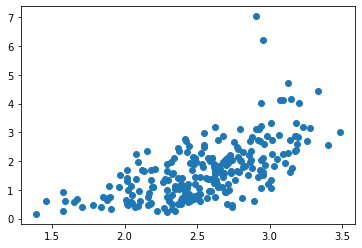

In [15]:
plt.subplot(1,1,1)
plt.scatter(new_hu['增跌幅'],new_hu['换手率'])#查看数据的散点图

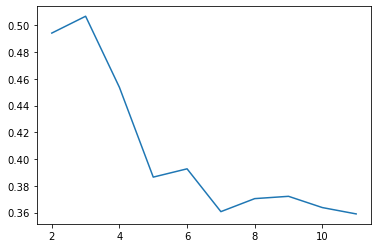

In [21]:
x = new_hu[['增跌幅','换手率']]
score = []
for v in range(10):
    model = k_means(x,n_clusters=v+2)
    score.append(metrics.silhouette_score(x,model[1]))
plt.plot(range(2,12,1),score)#有折线图可知在k=3时，轮廓系数最接近于1

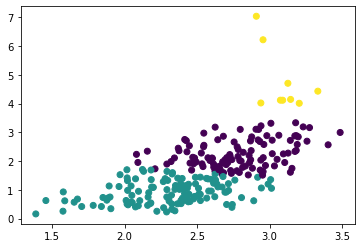

In [22]:
model = k_means(x,n_clusters=3)
plt.scatter(new_hu['增跌幅'],new_hu['换手率'],c=model[1])
plt.show()

In [26]:
mode = KMeans(n_clusters=3,random_state=0).fit(x)
mode.labels_#查看股票的类别

array([0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0])

In [27]:
AG = pd.read_excel('C:\\Users\\23224\\数据\\a股股票代码.xlsx',converters = {'A股代码':str})#防止A股代码这一列0无法读取
AG = AG.set_index('A股代码')#将股票代码作为索引
AG['A股代码']=AG.index
order = ['A股代码','A股简称','所属行业']
AG = AG[order]#获取A股代码、A股简称、所属行业数据
label = max(mode.labels_)#查看聚类的最大类别，方便之后查看股票类别个数
m0 =[]
print('股票总类别: {}'.format(label+1)) # 3，即得到3个类别
for i in range(label+1):
#     print('Cluster: {}----> stocks: {}'.format(i,','.join(np.array(x.index)[mode.labels_==i]))) #只有股票代码
    m = {}
    stock = np.array(x.index)[mode.labels_==i].tolist()   #查看每一个类别所对应的股票代码
    names=AG.loc[stock,:]#查看股票代码所对应的股票名称
    names1=np.array(names)#将数据框变为数组
    names2=names1.tolist()#将数组变为列表
    for k in names2:#遍历输出
        m['类别']=str(i)
        m['股票信息']=k
        m0.append(m)
        print(m)
# m = pd.DataFrame(m)
# m.to_excel('股票类别.xlsx')

股票总类别: 3
{'类别': '0', '股票信息': ['000005', '世纪星源', 'N 公共环保']}
{'类别': '0', '股票信息': ['000027', '深圳能源', 'D 水电煤气']}
{'类别': '0', '股票信息': ['000036', '华联控股', 'K 房地产']}
{'类别': '0', '股票信息': ['000069', '华侨城Ａ', 'K 房地产']}
{'类别': '0', '股票信息': ['000089', '深圳机场', 'G 运输仓储']}
{'类别': '0', '股票信息': ['000096', '广聚能源', 'F 批发零售']}
{'类别': '0', '股票信息': ['000157', '中联重科', 'C 制造业']}
{'类别': '0', '股票信息': ['000400', '许继电气', 'C 制造业']}
{'类别': '0', '股票信息': ['000402', '金 融 街', 'K 房地产']}
{'类别': '0', '股票信息': ['000417', '合肥百货', 'F 批发零售']}
{'类别': '0', '股票信息': ['000419', '通程控股', 'F 批发零售']}
{'类别': '0', '股票信息': ['000423', '东阿阿胶', 'C 制造业']}
{'类别': '0', '股票信息': ['000428', '华天酒店', 'H 住宿餐饮']}
{'类别': '0', '股票信息': ['000501', '鄂武商Ａ', 'F 批发零售']}
{'类别': '0', '股票信息': ['000528', '柳    工', 'C 制造业']}
{'类别': '0', '股票信息': ['000539', '粤电力Ａ', 'D 水电煤气']}
{'类别': '0', '股票信息': ['000541', '佛山照明', 'C 制造业']}
{'类别': '0', '股票信息': ['000550', '江铃汽车', 'C 制造业']}
{'类别': '0', '股票信息': ['000552', '靖远煤电', 'B 采矿业']}
{'类别': '0', '股票信息': ['000581', '威孚高科', 'C 制造业']}